In [45]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import gmaps
import os

from config import gkey

In [30]:
csv_path = "Resources/super_clean_data.csv"

ny_airbb_data_df = pd.read_csv(csv_path)

ny_airbb_data_df.head()

,Unnamed: 0,ID,Room Name,Accomodates,Cleaning Fee,Reviews Per Month,Rating Score,Accuracy Score,Cleanliness,Checkin Score,...,Value Score,Host ID,Borough,Neighbourhood,Latitude,Longitude,Type Room,Price (per night),Number of Reviews,Availability per 365
0,0,2595,Skylit Midtown Castle,1,$95.00,0.39,94.0,94.0,94.0,10.0,...,9.0,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,355
1,1,2595,Skylit Midtown Castle,1,$95.00,0.39,94.0,94.0,94.0,10.0,...,9.0,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,355
2,2,2595,Skylit Midtown Castle,2,$95.00,0.38,94.0,94.0,94.0,10.0,...,9.0,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,355
3,6,5099,Large Cozy 1 BR Apartment In Midtown East,2,$125.00,0.59,90.0,90.0,90.0,10.0,...,9.0,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,74,129
4,7,5099,Large Cozy 1 BR Apartment In Midtown East,2,$125.00,0.60,90.0,90.0,90.0,10.0,...,9.0,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,74,129


In [31]:
ny_airbb_data_df['Cleaning Fee'] = ny_airbb_data_df['Cleaning Fee'].str.replace('$', '')
ny_airbb_data_df['Cleaning Fee'] = ny_airbb_data_df['Cleaning Fee'].str.replace(',', '')
  
ny_airbb_data_df.astype({'Cleaning Fee': 'float'}).dtypes

Unnamed: 0                int64
ID                        int64
Room Name                object
Accomodates               int64
Cleaning Fee            float64
Reviews Per Month       float64
Rating Score            float64
Accuracy Score          float64
Cleanliness             float64
Checkin Score           float64
Communication Score     float64
Location Score          float64
Value Score             float64
Host ID                   int64
Borough                  object
Neighbourhood            object
Latitude                float64
Longitude               float64
Type Room                object
Price (per night)         int64
Number of Reviews         int64
Availability per 365      int64
dtype: object

In [32]:
# ny_airbb_data_df['Total Price (per night)'] = ny_airbb_data_df['Cleaning Fee'] + ny_airbb_data_df['Price (per night)']

total_prices = []


# for row in ny_airbb_data_df.iterrows():
for index, row in ny_airbb_data_df.iterrows():
   
    cleaning_fee = row['Cleaning Fee']

    base_fee = row['Price (per night)']

    total = int(base_fee) + float(cleaning_fee)

    total_prices.append(total)


    


In [33]:
ny_airbb_data_df["Total Price (per night)"] = total_prices

In [34]:
print(ny_airbb_data_df.columns.values)

['Unnamed: 0' 'ID' 'Room Name' 'Accomodates' 'Cleaning Fee'
 'Reviews Per Month' 'Rating Score' 'Accuracy Score' 'Cleanliness'
 'Checkin Score' 'Communication Score' 'Location Score' 'Value Score'
 'Host ID' 'Borough' 'Neighbourhood' 'Latitude' 'Longitude' 'Type Room'
 'Price (per night)' 'Number of Reviews' 'Availability per 365'
 'Total Price (per night)']


In [35]:
clean_ny_airbb_data_df = pd.DataFrame(ny_airbb_data_df, columns = ['Host ID', 'Borough', 'Latitude', 'Longitude', 'Price (per night)', 'Cleaning Fee','Total Price (per night)', 'Rating Score'])
clean_ny_airbb_data_df.head()

,Host ID,Borough,Latitude,Longitude,Price (per night),Cleaning Fee,Total Price (per night),Rating Score
0,2845,Manhattan,40.75362,-73.98377,225,95.00,320.0,94.0
1,2845,Manhattan,40.75362,-73.98377,225,95.00,320.0,94.0
2,2845,Manhattan,40.75362,-73.98377,225,95.00,320.0,94.0
3,7322,Manhattan,40.74767,-73.97500,200,125.00,325.0,90.0
4,7322,Manhattan,40.74767,-73.97500,200,125.00,325.0,90.0


In [36]:
options = ['Manhattan', 'Brooklyn', 'Bronx']
  
# selecting rows based on condition
three_boroughs_df = clean_ny_airbb_data_df[clean_ny_airbb_data_df['Borough'].isin(options)]
three_boroughs_df.head()

,Host ID,Borough,Latitude,Longitude,Price (per night),Cleaning Fee,Total Price (per night),Rating Score
0,2845,Manhattan,40.75362,-73.98377,225,95.00,320.0,94.0
1,2845,Manhattan,40.75362,-73.98377,225,95.00,320.0,94.0
2,2845,Manhattan,40.75362,-73.98377,225,95.00,320.0,94.0
3,7322,Manhattan,40.74767,-73.97500,200,125.00,325.0,90.0
4,7322,Manhattan,40.74767,-73.97500,200,125.00,325.0,90.0


In [37]:
# Average cost of all bnbs by borough


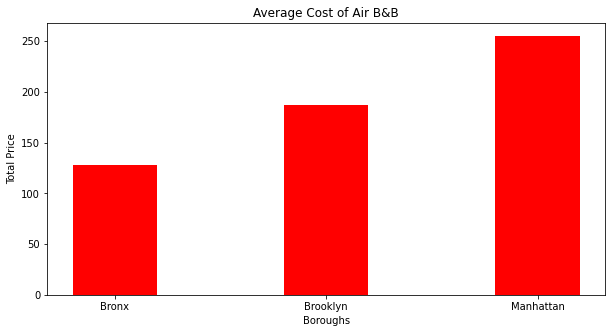

In [38]:
gb_boroughs_df = three_boroughs_df.groupby(["Borough"]).mean()

boroughs = ['Bronx', 'Brooklyn', 'Manhattan']

values = gb_boroughs_df['Total Price (per night)'].to_numpy()


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(boroughs, values, color ='r',
        width = 0.4)

plt.xlabel("Boroughs")
plt.ylabel("Total Price")
plt.title("Average Cost of Air B&B")
plt.show()



In [39]:
# Average rating of all bnbs by borough


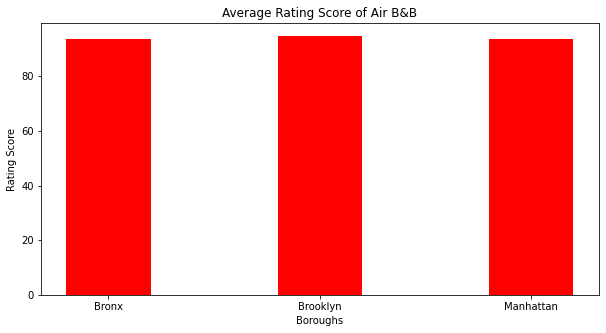

In [40]:
boroughs = ['Bronx', 'Brooklyn', 'Manhattan']

values = gb_boroughs_df['Rating Score'].to_numpy()


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(boroughs, values, color ='r',
        width = 0.4)

plt.xlabel("Boroughs")
plt.ylabel("Rating Score")
plt.title("Average Rating Score of Air B&B")
plt.show()

In [47]:
# Heat map of highest rated bnb
gmaps.configure(api_key = gkey)



In [48]:
lat_lng = three_boroughs_df[["Latitude", "Longitude"]].astype(float)

rating = three_boroughs_df["Rating Score"].astype(float)



In [53]:
fig = gmaps.figure(center=(46.0, -5.0), zoom_level=2)

rating_layer = gmaps.heatmap_layer(lat_lng, weights = rating, 
                                     dissipating = True, max_intensity = 100,
                                     point_radius = 3)
fig.add_layer(rating_layer)

fig


Figure(layout=FigureLayout(height='420px'))

In [ ]:
# Number of bnbs within a 10 mi radius of attraction by borough


In [ ]:
# Avg cost of bnbs within 10 mi radius of attraction by borough


In [ ]:
# Avg rating of bnbs within 10 mi radius of attraction by borough